/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Epoch 1/100
168/168 [==============================] - ETA: 0s - loss: 3.2241 - accuracy: 0.1386
Testing loss: 3.1060314178466797, acc: 0.21398809552192688
168/168 [==============================] - 8s 24ms/step - loss: 3.2241 - accuracy: 0.1386 - val_loss: 3.1068 - val_accuracy: 0.2094
Epoch 2/100
168/168 [==============================] - ETA: 0s - loss: 3.0434 - accuracy: 0.2116
Testing loss: 2.933518171310425, acc: 0.24196428060531616
168/168 [==============================] - 4s 22ms/step - loss: 3.0434 - accuracy: 0.2116 - val_loss: 2.9350 - val_accuracy: 0.2299
Epoch 3/100
166/168 [============================>.] - ETA: 0s - loss: 2.8792 - accuracy: 0.2353
Testing loss: 2.779860496520996, acc: 0.24732142686843872
168/168 [==============================] - 4s 22ms/step - loss: 2.8780 - accuracy: 0.2354 - val_loss: 2.7821 - val_accuracy: 0.2388
Epoch 4/100
168/168 [==============================] - ETA: 0s - loss: 2.7305 - accuracy: 0.2342
Testing loss: 2.6310596466064453, acc: 0.

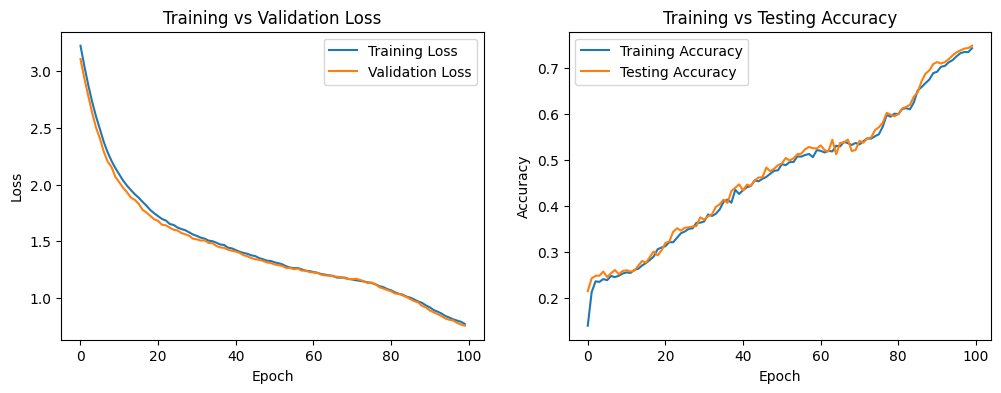

In [1]:
#for english 
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt

# Custom callback for test accuracy
class TestCallback(Callback):
    def __init__(self, test_data):
        self.test_data = test_data
        self.test_acc = []

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)
        self.test_acc.append(acc)
        print(f'\nTesting loss: {loss}, acc: {acc}')

# Function to resize images to 28x28
def resize_images(images, new_size=(28, 28)):
    resized_images = np.zeros((images.shape[0], new_size[0], new_size[1]))
    for i in range(images.shape[0]):
        resized_images[i] = cv2.resize(images[i], new_size, interpolation=cv2.INTER_AREA)
    return resized_images

# Load data
x_train = pd.read_csv("/kaggle/input/ahcd1/csvTrainImages 13440x1024.csv", header=None)
y_train = pd.read_csv("/kaggle/input/ahcd1/csvTrainLabel 13440x1.csv", header=None)
x_test = pd.read_csv("/kaggle/input/ahcd1/csvTestImages 3360x1024.csv", header=None)
y_test = pd.read_csv("/kaggle/input/ahcd1/csvTestLabel 3360x1.csv", header=None)

# Preprocess and normalize data
x_train = x_train.to_numpy().reshape(-1, 32, 32) / 255.0
x_train = resize_images(x_train)  # Resize to 28x28
x_test = x_test.to_numpy().reshape(-1, 32, 32) / 255.0
x_test = resize_images(x_test)  # Resize to 28x28

# Reshape to add channel dimension (for grayscale images)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Shuffle datasets
x_train, y_train = shuffle(x_train, y_train)
x_test, y_test = shuffle(x_test, y_test)

# Adjust labels (subtract 1 to make them start from 0)
y_train = y_train - 1
y_test = y_test - 1

# Convert labels to one-hot encoding
y_train_h = to_categorical(y_train, 28)
y_test_h = to_categorical(y_test, 28)

# Split training data for validation
x_train, x_val, y_train_h, y_val_h = train_test_split(x_train, y_train_h, test_size=0.2, random_state=42)

# Reshape validation data to add channel dimension
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)

# Image data augmentation
train_datagen = ImageDataGenerator(zoom_range=0.2, width_shift_range=0.10, height_shift_range=0.10, shear_range=0.1, fill_mode='nearest')
val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

# Data generators
train_generator = train_datagen.flow(x_train, y_train_h, batch_size=64)
val_generator = val_datagen.flow(x_val, y_val_h, batch_size=64)
test_generator = test_datagen.flow(x_test, y_test_h, batch_size=64)

# Load your pre-trained model
model = load_model('/kaggle/input/modelenglish/model (2).h5')

model.add(Dense(28, activation='softmax', name='output_dense_layer'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Initialize the custom callback
test_callback = TestCallback((x_test, y_test_h))

# Train the model
history = model.fit(
    train_generator, 
    epochs=100,  
    validation_data=val_generator,
    callbacks=[test_callback]  # Add the test callback here
)

# Plotting the results
# Training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Training and test accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(test_callback.test_acc, label='Testing Accuracy')
plt.title('Training vs Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 24, 24, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 512)               4719104   
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                              

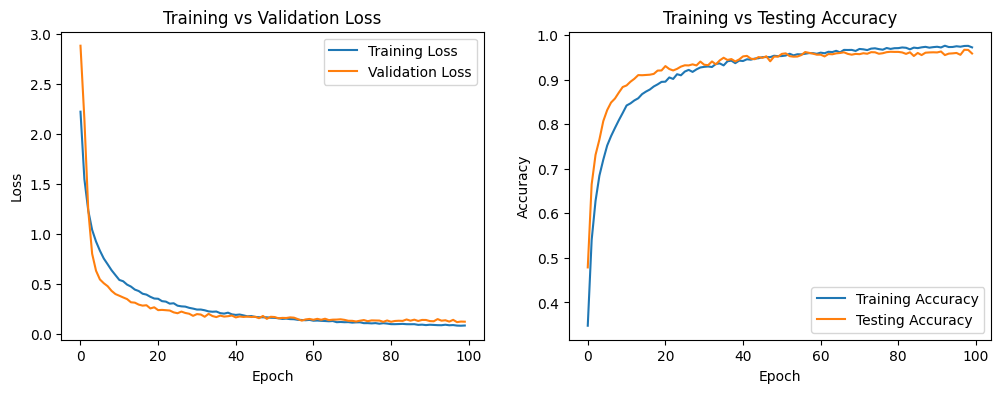

In [2]:
#for english 
import pandas as pd
from tensorflow.keras.optimizers import Adam
import numpy as np
import tensorflow as tf
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.models import Model

# Custom callback for test accuracy
class TestCallback(Callback):
    def __init__(self, test_data):
        self.test_data = test_data
        self.test_acc = []

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)
        self.test_acc.append(acc)
        print(f'\nTesting loss: {loss}, acc: {acc}')

# Function to resize images to 28x28
def resize_images(images, new_size=(28, 28)):
    resized_images = np.zeros((images.shape[0], new_size[0], new_size[1]))
    for i in range(images.shape[0]):
        resized_images[i] = cv2.resize(images[i], new_size, interpolation=cv2.INTER_AREA)
    return resized_images

# Load data
x_train = pd.read_csv("/kaggle/input/ahcd1/csvTrainImages 13440x1024.csv", header=None)
y_train = pd.read_csv("/kaggle/input/ahcd1/csvTrainLabel 13440x1.csv", header=None)
x_test = pd.read_csv("/kaggle/input/ahcd1/csvTestImages 3360x1024.csv", header=None)
y_test = pd.read_csv("/kaggle/input/ahcd1/csvTestLabel 3360x1.csv", header=None)

# Preprocess and normalize data
x_train = x_train.to_numpy().reshape(-1, 32, 32) / 255.0
x_train = resize_images(x_train)  # Resize to 28x28
x_test = x_test.to_numpy().reshape(-1, 32, 32) / 255.0
x_test = resize_images(x_test)  # Resize to 28x28

# Reshape to add channel dimension (for grayscale images)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Shuffle datasets
x_train, y_train = shuffle(x_train, y_train)
x_test, y_test = shuffle(x_test, y_test)

# Adjust labels (subtract 1 to make them start from 0)
y_train = y_train - 1
y_test = y_test - 1

# Convert labels to one-hot encoding
y_train_h = to_categorical(y_train, 28)
y_test_h = to_categorical(y_test, 28)

# Split training data for validation
x_train, x_val, y_train_h, y_val_h = train_test_split(x_train, y_train_h, test_size=0.2, random_state=42)

# Reshape validation data to add channel dimension
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)

# Image data augmentation
train_datagen = ImageDataGenerator(zoom_range=0.2, width_shift_range=0.10, height_shift_range=0.10, shear_range=0.1, fill_mode='nearest')
val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

# Data generators
train_generator = train_datagen.flow(x_train, y_train_h, batch_size=64)
val_generator = val_datagen.flow(x_val, y_val_h, batch_size=64)
test_generator = test_datagen.flow(x_test, y_test_h, batch_size=64)

pretrained_model = load_model('/kaggle/input/modelenglish/model (2).h5')

# Create a new input layer for the new input shape (28x28 with 1 channel)
input_layer = Input(shape=(28, 28, 1))

# Add layers to the pre-trained model
x = Conv2D(64, (5, 5), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
# Output layer
output_layer = Dense(28, activation='softmax', name='output_dense_layer')(x)

# Create a new model
model = Model(inputs=input_layer, outputs=output_layer)

learning_rate = 0.0001

# Create an Adam optimizer with the desired learning rate
adam_optimizer = Adam(learning_rate=learning_rate)

# Compile the model with the custom optimizer
model.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

test_callback = TestCallback((x_test, y_test_h))

# Train the model
history = model.fit(
    train_generator, 
    epochs=100,  # Adjust the number of epochs as needed
    validation_data=val_generator,
    callbacks=[test_callback]  # Add the test callback here
)

# Plotting the results
# Training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Training and test accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(test_callback.test_acc, label='Testing Accuracy')
plt.title('Training vs Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Epoch 1/100


2024-01-30 18:21:57.973597: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


167/168 [============================>.] - ETA: 0s - loss: 3.3287 - accuracy: 0.0411
Testing loss: 3.291870355606079, acc: 0.05863095074892044
168/168 [==============================] - 6s 23ms/step - loss: 3.3285 - accuracy: 0.0412 - val_loss: 3.2929 - val_accuracy: 0.0539
Epoch 2/100
166/168 [============================>.] - ETA: 0s - loss: 3.2425 - accuracy: 0.1006
Testing loss: 3.1439993381500244, acc: 0.16428571939468384
168/168 [==============================] - 4s 22ms/step - loss: 3.2419 - accuracy: 0.1004 - val_loss: 3.1453 - val_accuracy: 0.1574
Epoch 3/100
166/168 [============================>.] - ETA: 0s - loss: 3.1373 - accuracy: 0.1398
Testing loss: 3.0089340209960938, acc: 0.20952381193637848
168/168 [==============================] - 4s 22ms/step - loss: 3.1365 - accuracy: 0.1406 - val_loss: 3.0147 - val_accuracy: 0.2065
Epoch 4/100
166/168 [============================>.] - ETA: 0s - loss: 3.0319 - accuracy: 0.1644
Testing loss: 2.890277624130249, acc: 0.217857137322

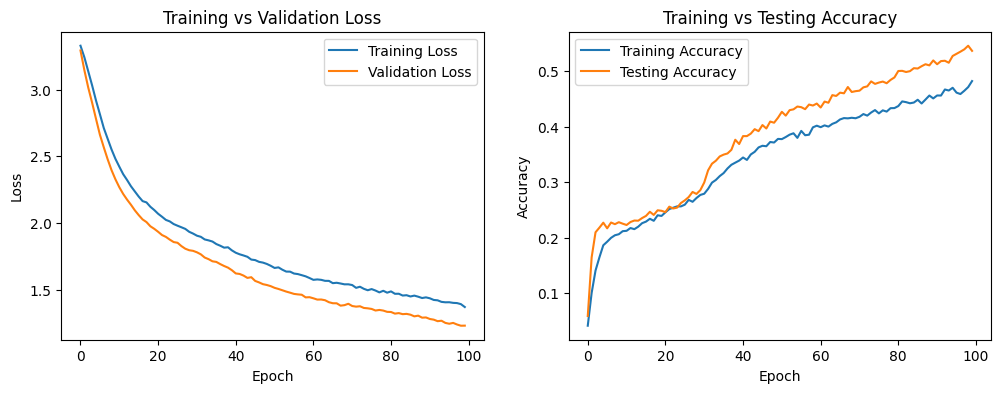

In [3]:
#for digital 
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt

# Custom callback for test accuracy
class TestCallback(Callback):
    def __init__(self, test_data):
        self.test_data = test_data
        self.test_acc = []

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)
        self.test_acc.append(acc)
        print(f'\nTesting loss: {loss}, acc: {acc}')

# Function to resize images to 28x28
def resize_images(images, new_size=(28, 28)):
    resized_images = np.zeros((images.shape[0], new_size[0], new_size[1]))
    for i in range(images.shape[0]):
        resized_images[i] = cv2.resize(images[i], new_size, interpolation=cv2.INTER_AREA)
    return resized_images

# Load data
x_train = pd.read_csv("/kaggle/input/ahcd1/csvTrainImages 13440x1024.csv", header=None)
y_train = pd.read_csv("/kaggle/input/ahcd1/csvTrainLabel 13440x1.csv", header=None)
x_test = pd.read_csv("/kaggle/input/ahcd1/csvTestImages 3360x1024.csv", header=None)
y_test = pd.read_csv("/kaggle/input/ahcd1/csvTestLabel 3360x1.csv", header=None)

# Preprocess and normalize data
x_train = x_train.to_numpy().reshape(-1, 32, 32) / 255.0
x_train = resize_images(x_train)  # Resize to 28x28
x_test = x_test.to_numpy().reshape(-1, 32, 32) / 255.0
x_test = resize_images(x_test)  # Resize to 28x28

# Reshape to add channel dimension (for grayscale images)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Shuffle datasets
x_train, y_train = shuffle(x_train, y_train)
x_test, y_test = shuffle(x_test, y_test)

# Adjust labels (subtract 1 to make them start from 0)
y_train = y_train - 1
y_test = y_test - 1

# Convert labels to one-hot encoding
y_train_h = to_categorical(y_train, 28)
y_test_h = to_categorical(y_test, 28)

# Split training data for validation
x_train, x_val, y_train_h, y_val_h = train_test_split(x_train, y_train_h, test_size=0.2, random_state=42)

# Reshape validation data to add channel dimension
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)

# Image data augmentation
train_datagen = ImageDataGenerator(zoom_range=0.2, width_shift_range=0.10, height_shift_range=0.10, shear_range=0.1, fill_mode='nearest')
val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

# Data generators
train_generator = train_datagen.flow(x_train, y_train_h, batch_size=64)
val_generator = val_datagen.flow(x_val, y_val_h, batch_size=64)
test_generator = test_datagen.flow(x_test, y_test_h, batch_size=64)

# Load your pre-trained model
model = load_model('/kaggle/input/tesssst/CNN_Model.h5')

model.add(Dense(28, activation='softmax', name='output_dense_layer'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Initialize the custom callback
test_callback = TestCallback((x_test, y_test_h))

# Train the model
history = model.fit(
    train_generator, 
    epochs=100,  # Adjust the number of epochs as needed
    validation_data=val_generator,
    callbacks=[test_callback]  # Add the test callback here
)

# Plotting the results
# Training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Training and test accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(test_callback.test_acc, label='Testing Accuracy')
plt.title('Training vs Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
